In [1]:
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
data = pd.read_csv("E:\SampleSuper.csv")

In [3]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
data.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [13]:
ndata = data.drop(["Postal Code"],axis=1)

In [14]:
ndata.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [15]:
ndata.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [16]:
print(ndata['Category'].unique())

['Furniture' 'Office Supplies' 'Technology']


In [17]:
no_of_subcategory = data["Sub-Category"].nunique()
print("Category has %d Sub-Category"%no_of_subcategory)

Category has 17 Sub-Category


In [18]:
# creating Profit data

In [22]:
profit = ndata[ndata["Profit"]>0]

In [23]:
profit.describe()

,Sales,Quantity,Discount,Profit
count,8058.000000,8058.000000,8058.000000,8058.000000
mean,223.480623,3.794738,0.081044,54.917884
std,600.340641,2.244696,0.098884,213.713980
min,0.990000,1.000000,0.000000,0.062800
25%,17.940000,2.000000,0.000000,5.324550
50%,50.965000,3.000000,0.000000,13.317600
75%,191.976000,5.000000,0.200000,40.465550
max,17499.950000,14.000000,0.400000,8399.976000


In [24]:
profit.groupby(by="Segment").sum("Sales")

,Sales,Quantity,Discount,Profit
Segment,,,,
Consumer,895785.9910,15746,338.85,219064.9204
Corporate,568564.0255,9344,203.95,136766.3416
Home Office,336456.8420,5488,110.25,86697.0454


In [26]:
profit.groupby(by="Sub-Category").sum("Sales")

,Sales,Quantity,Discount,Profit
Sub-Category,,,,
Accessories,156396.8460,2643,42.40,42867.2622
Appliances,104149.6270,1494,24.00,26767.6466
Art,27118.7920,3000,59.60,6527.7870
Binders,167272.1200,3518,114.60,68732.2597
Bookcases,66366.9435,440,9.65,8679.6500
Chairs,220870.1410,1396,38.60,36471.0076
Copiers,149528.0300,234,11.00,55617.8249
Envelopes,16476.4020,906,20.40,6964.1767
Fasteners,2840.5900,843,15.40,982.7134


In [28]:
# 5 cities with least profit
profit.groupby(by="City").sum("Sales").sort_values("Profit").head(5)

,Sales,Quantity,Discount,Profit
City,,,,
Jupiter,2.064,1,0.2,0.1548
Bethlehem,9.480,3,0.2,0.7110
San Luis Obispo,3.620,2,0.0,1.1946
Arlington Heights,14.112,6,0.2,1.2348
Cuyahoga Falls,8.352,6,0.2,1.2528


In [29]:
# 5 cities with highest profit
profit.groupby(by="City").sum("Sales").sort_values("Profit").tail(5)

,Sales,Quantity,Discount,Profit
City,,,,
Detroit,42446.944,441,0.80,13181.7908
San Francisco,99342.638,1839,28.85,18849.1535
Seattle,113956.790,1516,24.40,29541.2676
Los Angeles,160363.606,2723,47.60,31611.0879
New York City,234654.729,3257,39.20,66003.0063


In [30]:
# VISULATISATION
import matplotlib.pyplot as plt

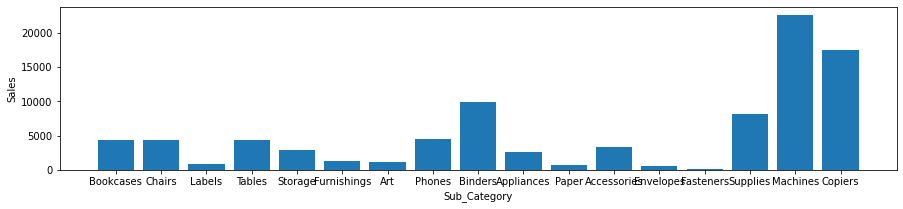

In [32]:
# Bar graph of sales v/s cities
plt.rcParams["figure.figsize"]=(15,3)
plt.bar(ndata['Sub-Category'],data['Sales']);
plt.rcParams.update({'font.size':10});
plt.xlabel('Sub_Category');
plt.ylabel('Sales');

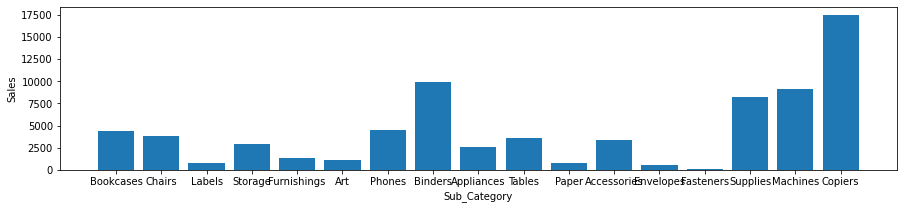

In [33]:
plt.rcParams["figure.figsize"]=(15,3)
plt.bar(profit['Sub-Category'],profit['Sales']);
plt.rcParams.update({'font.size':10});
plt.xlabel('Sub_Category');
plt.ylabel('Sales');

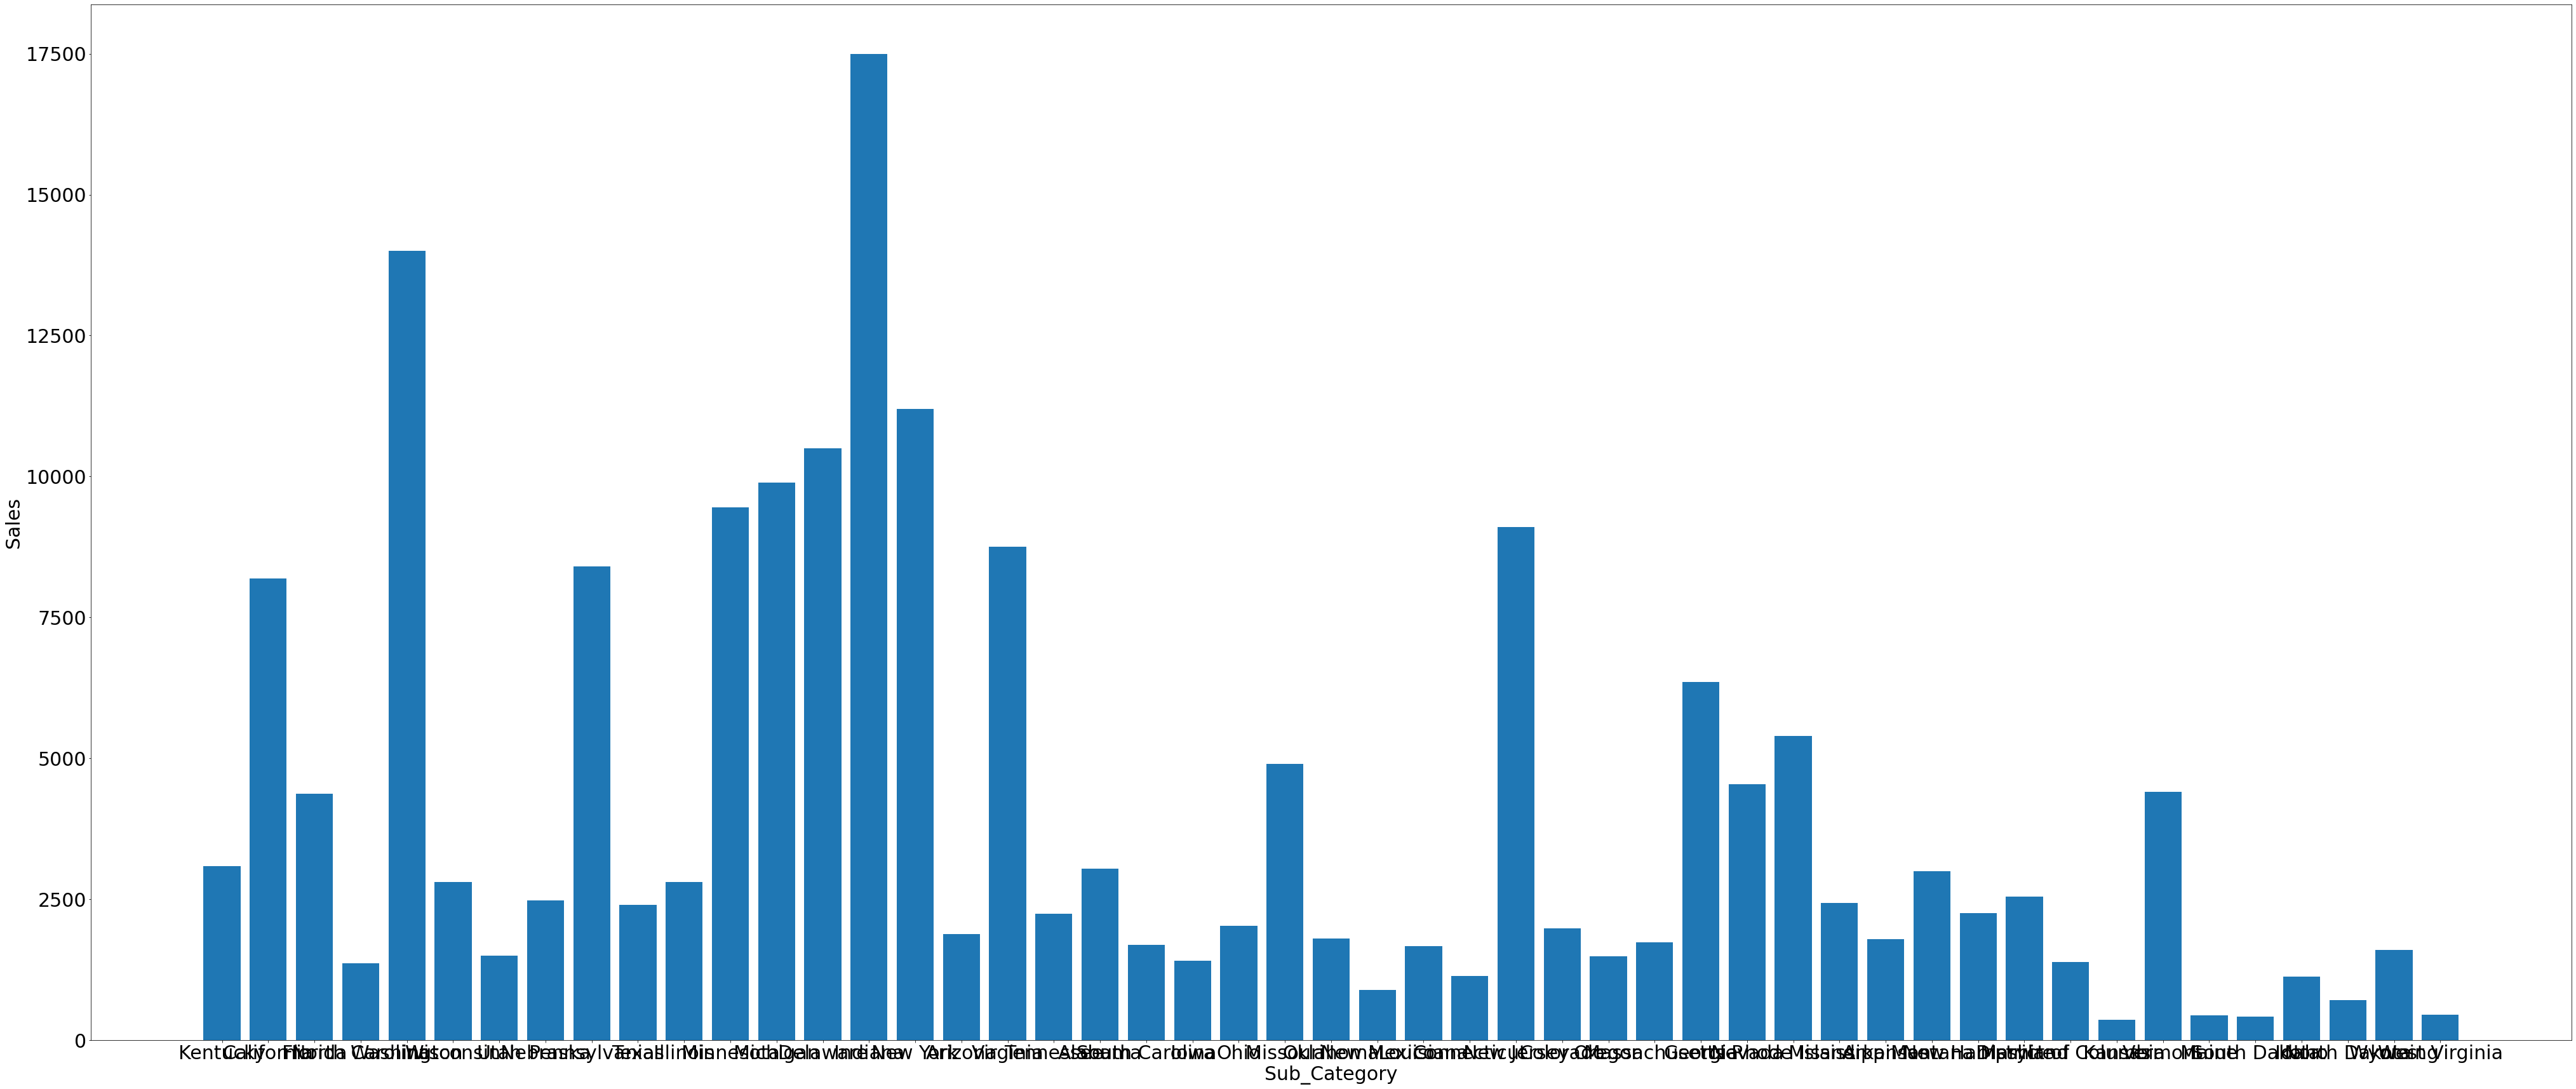

In [38]:
plt.rcParams["figure.figsize"]=(70,30)
plt.bar(profit['State'],profit['Sales']);
plt.rcParams.update({'font.size':30});
plt.xlabel('Sub_Category');
plt.ylabel('Sales');

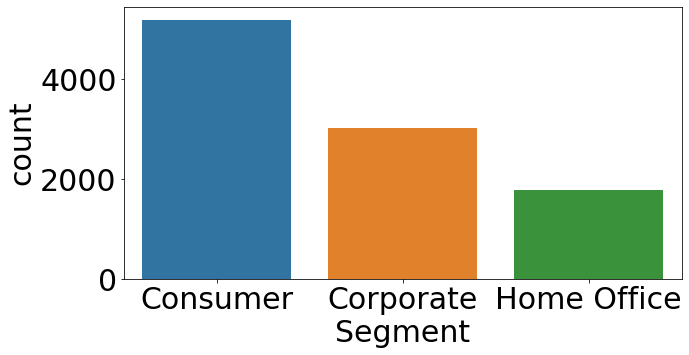

In [39]:
plt.rcParams['figure.figsize']=(10,5)
sns.countplot(x=data.Segment)
plt.show();

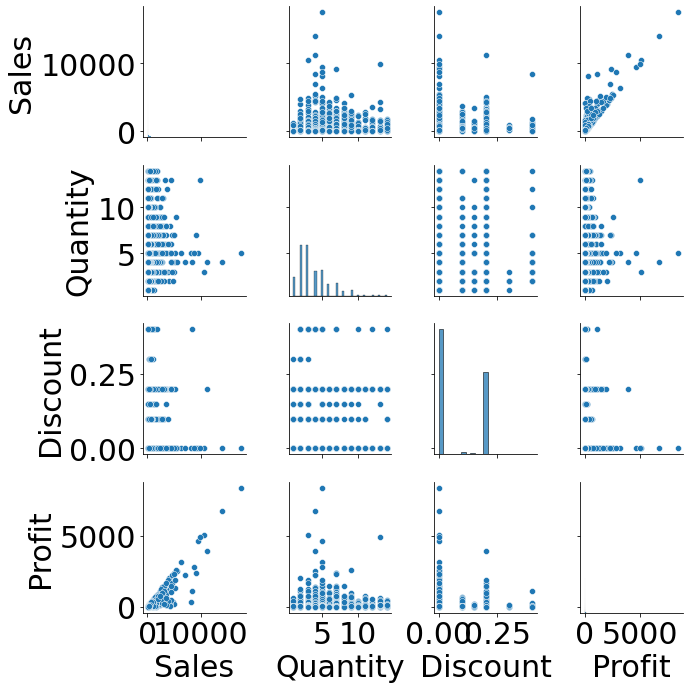

In [40]:
sns.pairplot(profit)